# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import hashlib
from datatable import Frame , dt
from datatable.models import Ftrl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings 
warnings.filterwarnings('ignore')

# Read Files

In [4]:
train_data = pd.read_csv('train.csv')
columns = [i for i in train_data.columns]
test_data = pd.read_csv('test.csv',names=columns)
train_label  = pd.read_csv('trainLabels.csv')

In [5]:
train_data

id   x1   x2                                            x3  \
0        1   NO   NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1        2  NaN  NaN                                           NaN   
2        3   NO   NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3        4  YES   NO  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4        5   NO   NO  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   
...    ...  ...  ...                                           ...   
9994  9995   NO   NO  jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=   
9995  9996   NO   NO  Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=   
9996  9997  YES  YES  9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=   
9997  9998   NO   NO  9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=   
9998  9999  YES  YES  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   

                                                x4        x5        x6  \
0     GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139   
1                                              NaN  0.000000  0.000000   
2     X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422   
3     YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  0.653912  0.041471   
4     3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  1.415919  0.000000   
...                                            ...       ...       ...   
9994  Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=  1.207136  0.082855   
9995  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  1.414798  0.000000   
9996  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  1.413677  0.000000   
9997  gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=  1.294118  0.000000   
9998  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  0.660897  0.042735   

            x7        x8        x9  ... x136   x137  x138  x139 x140  x141  \
0     0.481394  0.115697  0.472474  ...  0.0  0.810  3306  4676  YES    NO   
1     0.000000  0.000000  0.000000  ...  0.0  0.510  4678  3306  YES    NO   
2     0.935572  0.041440  0.501710  ...  0.0  0.850  4678  3306   NO    NO   
3     0.940787  0.090851  0.556564  ...  0.0  0.945  3306  4678   NO    NO   
4     1.000000  0.000000  0.375297  ...  0.0  1.000  1263   892   NO    NO   
...        ...       ...       ...  ...  ...    ...   ...   ...  ...   ...   
9994  0.918960  0.313880  0.495189  ...  0.0  0.810  4677  3307  YES    NO   
9995  1.000000  0.000000  0.357369  ...  0.0  1.000  1262   892  YES    NO   
9996  1.000000  0.000000  0.668517  ...  0.0  1.000  1261   892  YES    NO   
9997  1.000000  0.000000  0.570707  ...  1.0  1.000  1188   918   NO    NO   
9998  0.946581  0.086966  0.510278  ...  0.0  0.880  3308  4680  YES    NO   

      x142  x143      x144      x145  
0      YES     2  0.375535  0.464610  
1      YES     4  0.741682  0.593630  
2       NO     1  0.776467  0.493159  
3      YES     3  0.168234  0.546582  
4       NO     1  0.246637  0.361045  
...    ...   ...       ...       ...  
9994   YES     1  0.502268  0.486637  
9995   YES    15  0.890135  0.346276  
9996   YES     5  0.726457  0.659001  
9997    NO     3  0.450980  0.561448  
9998   YES     0  0.604274  0.499395  

[9999 rows x 146 columns]

In [6]:
test_data

id   x1   x2                                            x3  \
0     1698001   NO   NO  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1     1698002   NO   NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   
2     1698003   NO   NO  MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=   
3     1698004  NaN  NaN                                           NaN   
4     1698005   NO   NO  uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=   
...       ...  ...  ...                                           ...   
1995  1699996   NO   NO  Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=   
1996  1699997   NO   NO  LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=   
1997  1699998   NO   NO  /tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=   
1998  1699999   NO   NO  uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=   
1999  1700000   NO   NO  WAhQ/X/Jnshuigil3iUfuN/7xgMCklDnEc5N5eLGaVY=   

                                                x4        x5        x6  \
0     FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=  1.414798  0.000000   
1     WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834   
2     tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=  1.415919  0.000000   
3                                              NaN  0.000000  0.000000   
4     0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=  1.129212  0.087020   
...                                            ...       ...       ...   
1995  yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=  1.294118  0.000000   
1996  h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=  1.020217  0.583944   
1997  aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=  0.354706  0.550882   
1998  4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=  1.220588  0.102059   
1999  pkNFxQlGfRUOOpf5wTKhFS6Y0QYhdF3f6/IVoWQShY4=  0.699425  0.100695   

            x7        x8        x9  ... x136      x137  x138  x139 x140  x141  \
0     1.000000  0.000000  0.202060  ...  0.0  1.000000  1262   892   NO    NO   
1     0.945938  0.317427  0.482021  ...  1.0  0.866667  4672  3311   NO    NO   
2     1.000000  0.000000  0.703088  ... -1.0  1.000000  1263   892   NO    NO   
3     0.000000  0.000000  0.000000  ...  0.0  0.870000  4672  3306  YES    NO   
4     0.814240  1.112804  0.874318  ...  0.0  0.870000  4400  3413  YES    NO   
...        ...       ...       ...  ...  ...       ...   ...   ...  ...   ...   
1995  1.000000  0.000000  0.164141  ...  0.0  1.000000  1188   918  YES    NO   
1996  0.625842  1.003516  0.791136  ...  0.0  0.720000  4400  3413  YES    NO   
1997  0.930882  0.207941  0.207500  ...  0.0  0.845000  4400  3400   NO    NO   
1998  0.326176  1.213824  0.942955  ...  1.5  0.676667  4400  3400   NO    NO   
1999  0.793771  0.183550  0.420569  ...  0.0  0.580000  4677  3307   NO    NO   

      x142  x143      x144      x145  
0       NO     0  0.089686  0.193344  
1       NO     5  0.945032  0.471318  
2       NO     8  0.557175  0.693587  
3      YES     0  0.870538  0.405822  
4      YES     2  0.224729  0.870909  
...    ...   ...       ...       ...  
1995   YES     2  0.198257  0.155724  
1996   YES     0  0.582479  0.778864  
1997    NO     5  0.930588  0.201591  
1998    NO     2  0.256471  0.938182  
1999    NO     0  0.190807  0.416506  

[2000 rows x 146 columns]

In [7]:
train_label

id  y1  y2  y3  y4  y5  y6  y7  y8  y9  ...  y24  y25  y26  y27  \
0          1   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
1          2   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
2          3   0   0   1   0   0   0   0   0   0  ...    0    0    0    0   
3          4   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
4          5   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
49994  49995   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
49995  49996   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
49996  49997   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
49997  49998   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
49998  49999   0   0   0   0   0   1   0   0   0  ...    0    0    0    0   

       y28  y29  y30  y31  y32  y33  
0        0    0    0    0    0    1  
1        0    0    0    0    1    0  
2        0    0    0    0    0    0  
3        0    0    0    0    0    1  
4        0    0    0    0    0    1  
...    ...  ...  ...  ...  ...  ...  
49994    0    0    0    0    0    1  
49995    0    0    0    0    0    1  
49996    0    0    0    0    0    1  
49997    0    0    0    0    0    1  
49998    0    0    0    0    0    0  

[49999 rows x 34 columns]

# Drop Null Values

In [8]:
train_data.isnull().sum()

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
test_data.isnull().sum()

id        0
x1      294
x2      294
x3      294
x4      294
       ... 
x141      0
x142      0
x143      0
x144      0
x145      0
Length: 146, dtype: int64

In [11]:
test_data.dropna(inplace=True)

In [12]:
train_label.isnull().sum()

id     0
y1     0
y2     0
y3     0
y4     0
y5     0
y6     0
y7     0
y8     0
y9     0
y10    0
y11    0
y12    0
y13    0
y14    0
y15    0
y16    0
y17    0
y18    0
y19    0
y20    0
y21    0
y22    0
y23    0
y24    0
y25    0
y26    0
y27    0
y28    0
y29    0
y30    0
y31    0
y32    0
y33    0
dtype: int64

In [13]:
train_data.head(3)

id   x1  x2                                            x3  \
0   1   NO  NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
2   3   NO  NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3   4  YES  NO  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139  0.481394   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422  0.935572   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  0.653912  0.041471  0.940787   

         x8        x9  ... x136   x137  x138  x139 x140  x141  x142  x143  \
0  0.115697  0.472474  ...  0.0  0.810  3306  4676  YES    NO   YES     2   
2  0.041440  0.501710  ...  0.0  0.850  4678  3306   NO    NO    NO     1   
3  0.090851  0.556564  ...  0.0  0.945  3306  4678   NO    NO   YES     3   

       x144      x145  
0  0.375535  0.464610  
2  0.776467  0.493159  
3  0.168234  0.546582  

[3 rows x 146 columns]

In [14]:
test_data.head(3)

id  x1  x2                                            x3  \
1  1698002  NO  NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   
2  1698003  NO  NO  MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=   
4  1698005  NO  NO  uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=   

                                             x4        x5        x6        x7  \
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   
2  tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=  1.415919  0.000000  1.000000   
4  0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=  1.129212  0.087020  0.814240   

         x8        x9  ... x136      x137  x138  x139 x140  x141  x142  x143  \
1  0.317427  0.482021  ...  1.0  0.866667  4672  3311   NO    NO    NO     5   
2  0.000000  0.703088  ... -1.0  1.000000  1263   892   NO    NO    NO     8   
4  1.112804  0.874318  ...  0.0  0.870000  4400  3413  YES    NO   YES     2   

       x144      x145  
1  0.945032  0.471318  
2  0.557175  0.693587  
4  0.224729  0.870909  

[3 rows x 146 columns]

# Encode 'YES'/'NO' Columns

In [15]:
lb = LabelEncoder()

In [16]:
def yes_no_columns_encoder(data,yes_no_columns):
    for column in yes_no_columns:
        data[column] = lb.fit_transform(data[column])

In [17]:
yes_no_columns = [col for col in train_data.columns if train_data[col].isin(['YES', 'NO']).all()]
yes_no_columns_encoder(train_data,yes_no_columns)
yes_no_columns_encoder(test_data,yes_no_columns)

In [18]:
train_data

id  x1  x2                                            x3  \
0        1   0   0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
2        3   0   0  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3        4   1   0  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4        5   0   0  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   
5        6   0   0  cz26ErvsEb3tZqeaIlmLIwjn8D7YVXYynSLV1WltcUk=   
...    ...  ..  ..                                           ...   
9994  9995   0   0  jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=   
9995  9996   0   0  Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=   
9996  9997   1   1  9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=   
9997  9998   0   0  9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=   
9998  9999   1   1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   

                                                x4        x5        x6  \
0     GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139   
2     X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422   
3     YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  0.653912  0.041471   
4     3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  1.415919  0.000000   
5     olN1LoaeSyI8h+udI/jquozrw4R8YQ+cVwHq1dOUO5s=  1.413677  0.000000   
...                                            ...       ...       ...   
9994  Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=  1.207136  0.082855   
9995  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  1.414798  0.000000   
9996  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  1.413677  0.000000   
9997  gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=  1.294118  0.000000   
9998  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  0.660897  0.042735   

            x7        x8        x9  ...  x136   x137  x138  x139  x140  x141  \
0     0.481394  0.115697  0.472474  ...   0.0  0.810  3306  4676     1     0   
2     0.935572  0.041440  0.501710  ...   0.0  0.850  4678  3306     0     0   
3     0.940787  0.090851  0.556564  ...   0.0  0.945  3306  4678     0     0   
4     1.000000  0.000000  0.375297  ...   0.0  1.000  1263   892     0     0   
5     1.000000  0.000000  0.667724  ...   0.0  1.000  1261   892     1     0   
...        ...       ...       ...  ...   ...    ...   ...   ...   ...   ...   
9994  0.918960  0.313880  0.495189  ...   0.0  0.810  4677  3307     1     0   
9995  1.000000  0.000000  0.357369  ...   0.0  1.000  1262   892     1     0   
9996  1.000000  0.000000  0.668517  ...   0.0  1.000  1261   892     1     0   
9997  1.000000  0.000000  0.570707  ...   1.0  1.000  1188   918     0     0   
9998  0.946581  0.086966  0.510278  ...   0.0  0.880  3308  4680     1     0   

      x142  x143      x144      x145  
0        1     2  0.375535  0.464610  
2        0     1  0.776467  0.493159  
3        1     3  0.168234  0.546582  
4        0     1  0.246637  0.361045  
5        1     2  0.263453  0.659001  
...    ...   ...       ...       ...  
9994     1     1  0.502268  0.486637  
9995     1    15  0.890135  0.346276  
9996     1     5  0.726457  0.659001  
9997     0     3  0.450980  0.561448  
9998     1     0  0.604274  0.499395  

[7402 rows x 146 columns]

In [19]:
test_data

id  x1  x2                                            x3  \
1     1698002   0   0  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   
2     1698003   0   0  MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=   
4     1698005   0   0  uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=   
5     1698006   0   0  kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=   
6     1698007   0   0  NMFPnlbm6YWoxpG5KdcfdDMWWSZ7FYAUlJoLtkBBf9k=   
...       ...  ..  ..                                           ...   
1993  1699994   0   0  X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=   
1995  1699996   0   0  Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=   
1996  1699997   0   0  LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=   
1997  1699998   0   0  /tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=   
1998  1699999   0   0  uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=   

                                                x4        x5        x6  \
1     WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834   
2     tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=  1.415919  0.000000   
4     0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=  1.129212  0.087020   
5     4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=  1.415919  0.000000   
6     3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  1.414798  0.000000   
...                                            ...       ...       ...   
1993  +yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=  1.415919  0.000000   
1995  yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=  1.294118  0.000000   
1996  h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=  1.020217  0.583944   
1997  aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=  0.354706  0.550882   
1998  4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=  1.220588  0.102059   

            x7        x8        x9  ...  x136      x137  x138  x139  x140  \
1     0.945938  0.317427  0.482021  ...   1.0  0.866667  4672  3311     0   
2     1.000000  0.000000  0.703088  ...  -1.0  1.000000  1263   892     0   
4     0.814240  1.112804  0.874318  ...   0.0  0.870000  4400  3413     1   
5     1.000000  0.000000  0.232779  ...   0.0  1.000000  1263   892     1   
6     1.000000  0.000000  0.323296  ...  -1.0  1.000000  1262   892     1   
...        ...       ...       ...  ...   ...       ...   ...   ...   ...   
1993  1.000000  0.000000  0.297704  ...   0.0  1.000000  1263   892     0   
1995  1.000000  0.000000  0.164141  ...   0.0  1.000000  1188   918     1   
1996  0.625842  1.003516  0.791136  ...   0.0  0.720000  4400  3413     1   
1997  0.930882  0.207941  0.207500  ...   0.0  0.845000  4400  3400     0   
1998  0.326176  1.213824  0.942955  ...   1.5  0.676667  4400  3400     0   

      x141  x142  x143      x144      x145  
1        0     0     5  0.945032  0.471318  
2        0     0     8  0.557175  0.693587  
4        0     1     2  0.224729  0.870909  
5        0     1     6  0.536996  0.223278  
6        1     1     2  0.863229  0.323296  
...    ...   ...   ...       ...       ...  
1993     0     0    11  0.809417  0.288203  
1995     0     1     2  0.198257  0.155724  
1996     0     1     0  0.582479  0.778864  
1997     0     0     5  0.930588  0.201591  
1998     0     0     2  0.256471  0.938182  

[1465 rows x 146 columns]

# Convert Hash values into Numeric


In [20]:
def hash_to_int(hash_string):
    hash_string = str(hash_string)
    hash_object = hashlib.sha256(hash_string.encode())
    return int.from_bytes(hash_object.digest(), 'big')
for column, dtype in train_data.dtypes.items():
    if dtype == 'object':
        train_data[column] = train_data[column].apply(lambda x: hash_to_int(x) % 100000000)

# EDA (Exploratory Data Analysis)

Univariate Analysis

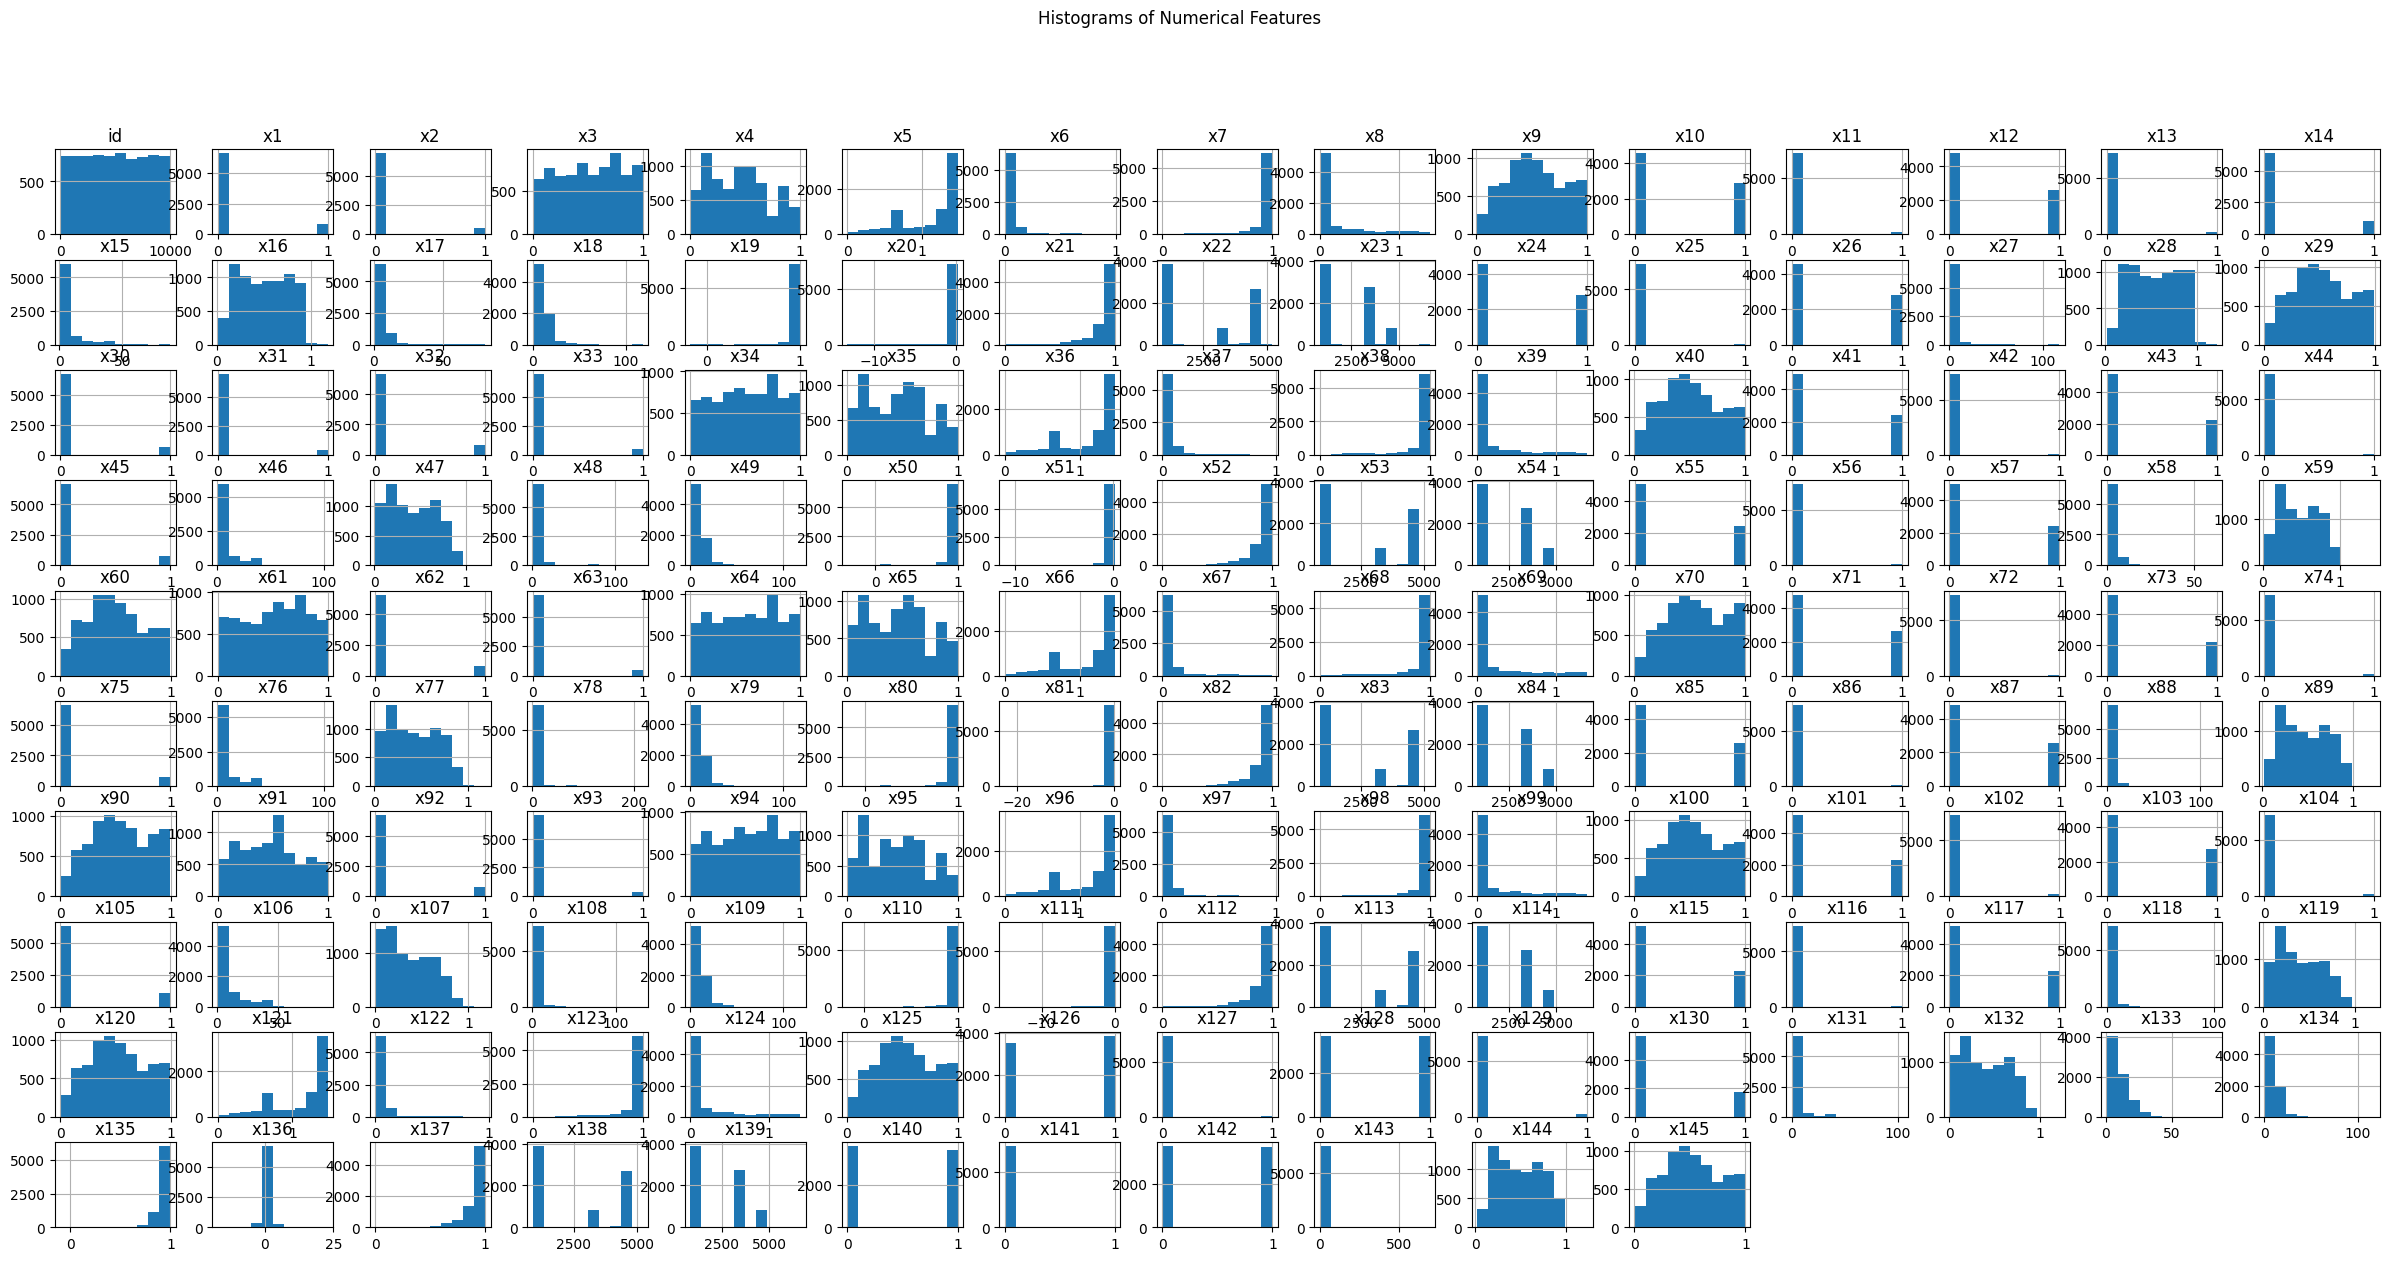

In [21]:
# Histograms for numerical features
train_data.hist(bins=10, figsize=(30, 14), layout=(10, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Count plots for categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(20, 16))
    sns.countplot(x=col, data=train_data)
    plt.title(f'Count Plot for {col}')
    plt.show()


Bivariate Analysis 

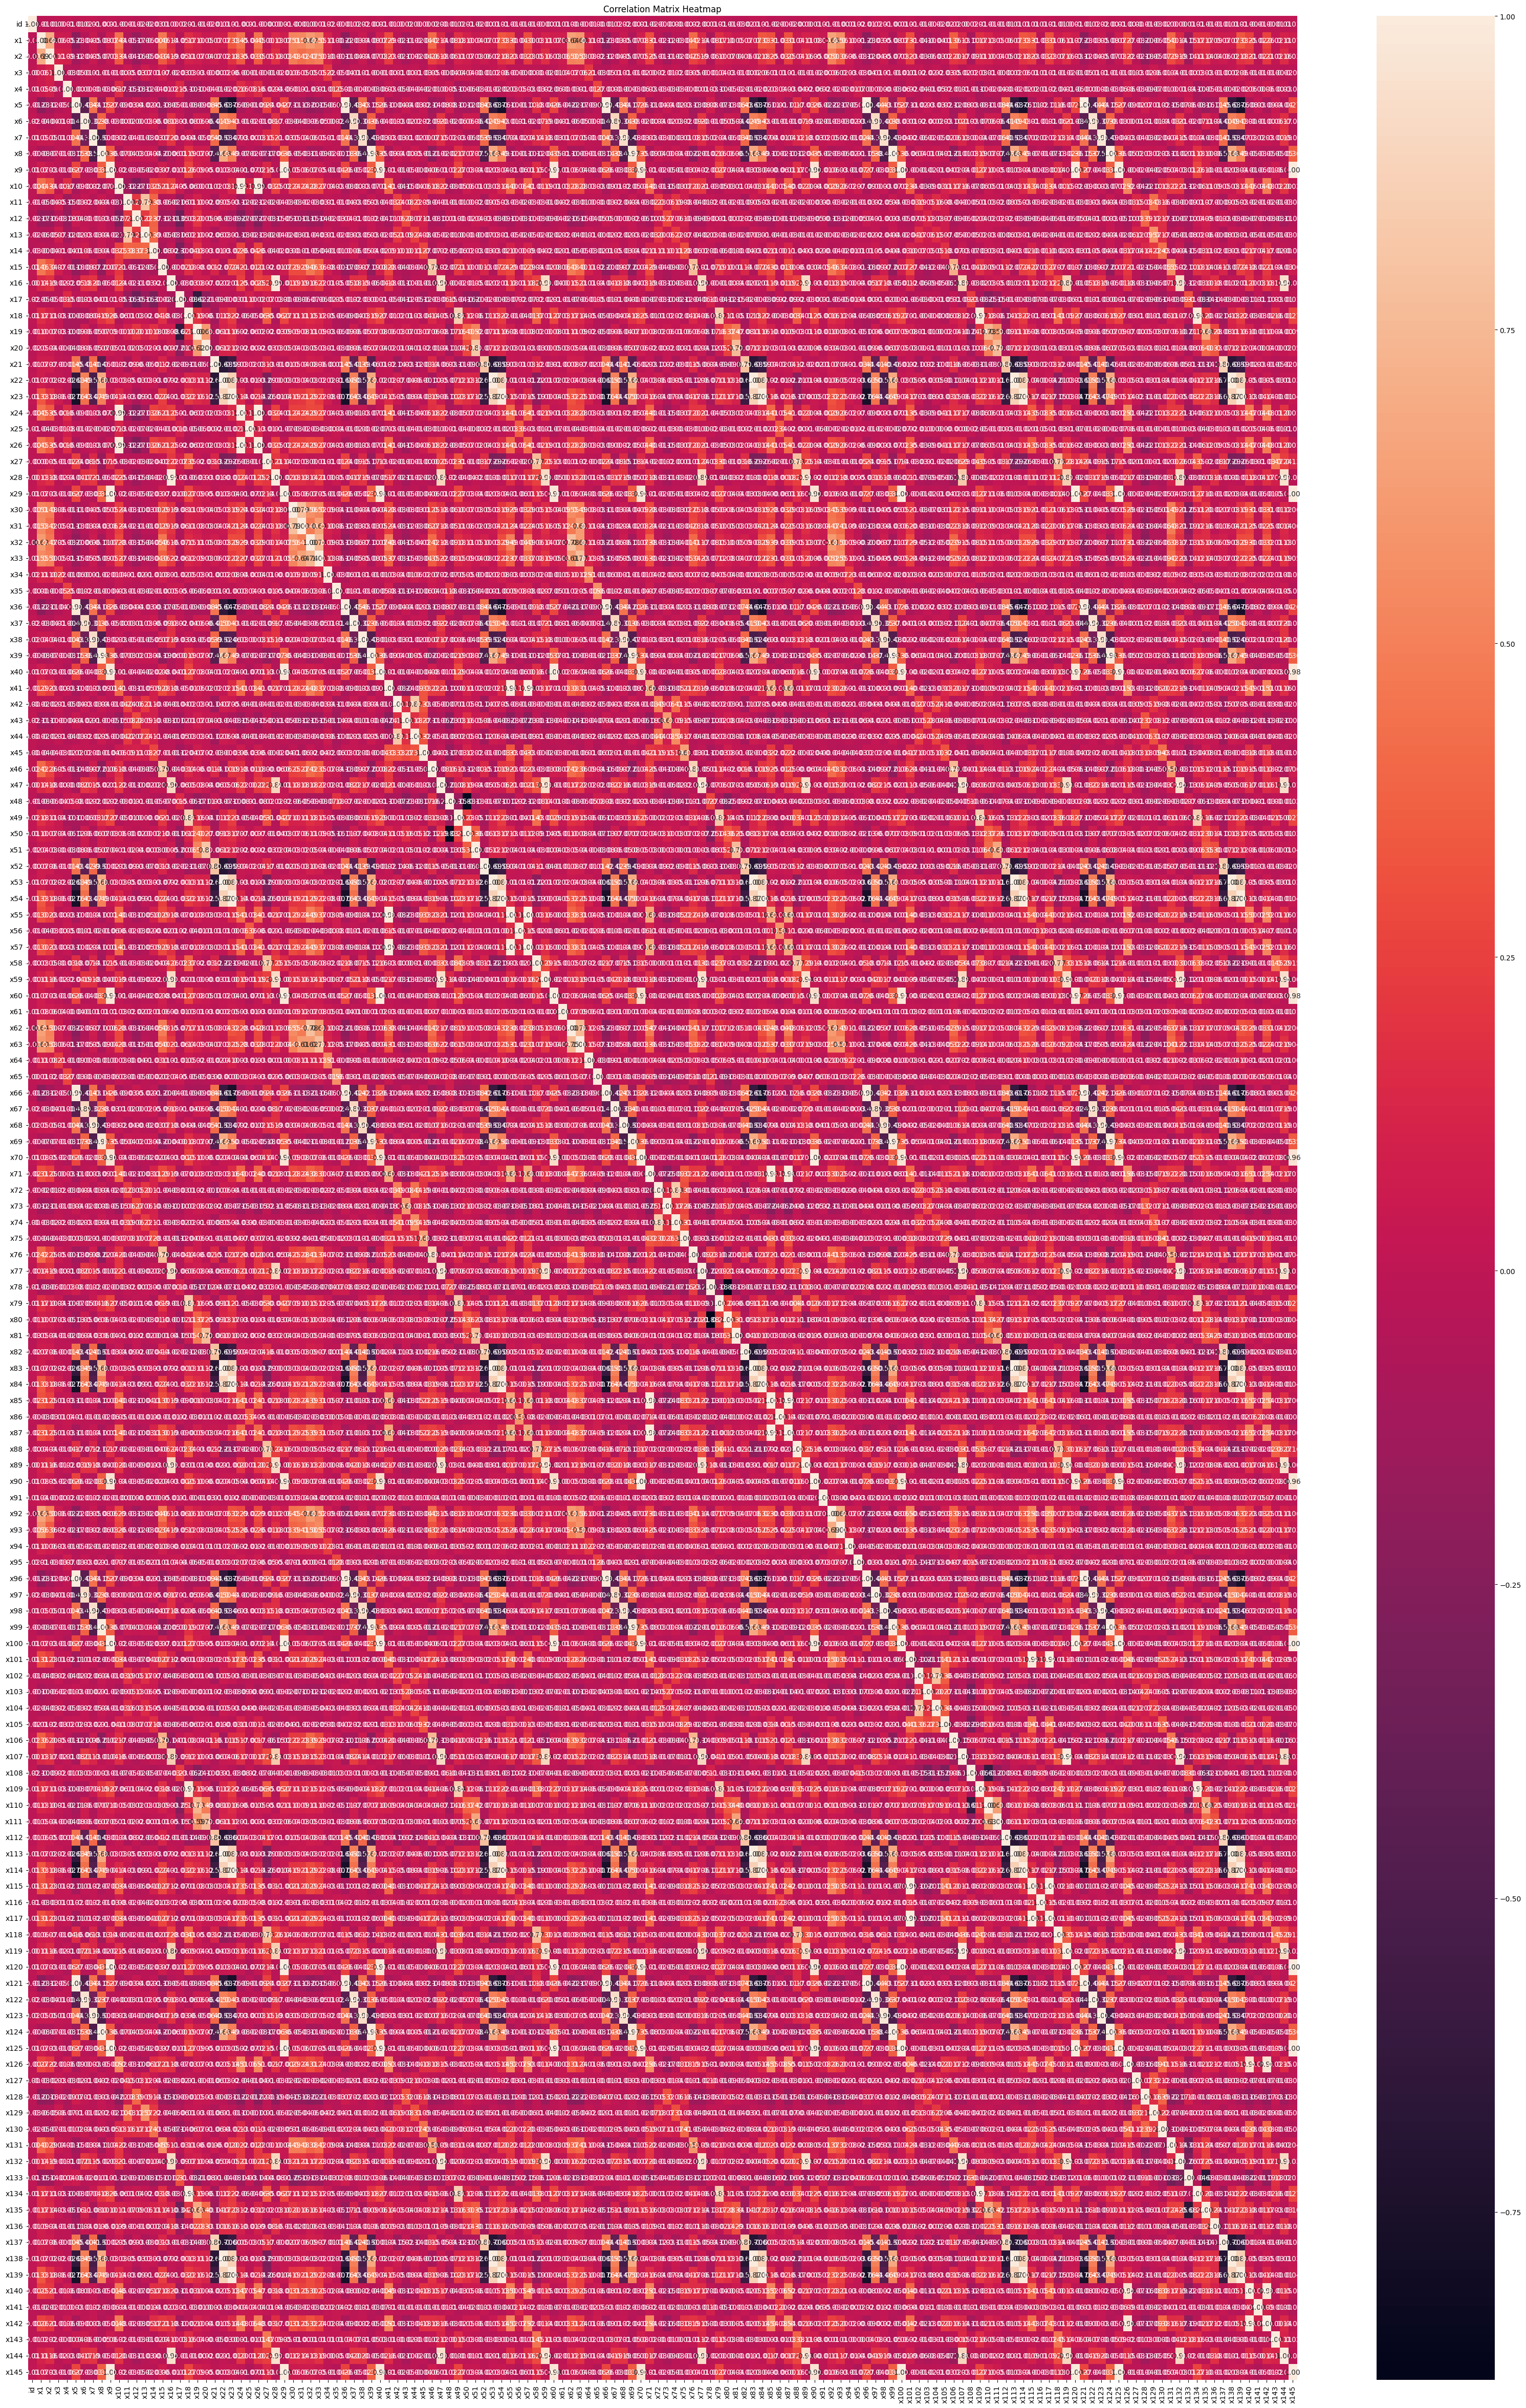

In [22]:

# Correlation matrix heatmap
plt.figure(figsize=(40, 60))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
x = train_data.drop(['id'],axis=1)
y = train_data['id']

In [24]:
train_data

id  x1  x2        x3        x4        x5        x6        x7  \
0        1   0   0  82627868  67415144  0.576561  0.073139  0.481394   
2        3   0   0  12498617  16703188  1.341803  0.051422  0.935572   
3        4   1   0  93179689  43522992  0.653912  0.041471  0.940787   
4        5   0   0  96131918  12874591  1.415919  0.000000  1.000000   
5        6   0   0   4396467  18857071  1.413677  0.000000  1.000000   
...    ...  ..  ..       ...       ...       ...       ...       ...   
9994  9995   0   0  51808017  70752315  1.207136  0.082855  0.918960   
9995  9996   0   0  35629299  57500845  1.414798  0.000000  1.000000   
9996  9997   1   1  76678090  48261167  1.413677  0.000000  1.000000   
9997  9998   0   0  19939858  99274320  1.294118  0.000000  1.000000   
9998  9999   1   1  74626603  57500845  0.660897  0.042735  0.946581   

            x8        x9  ...  x136   x137  x138  x139  x140  x141  x142  \
0     0.115697  0.472474  ...   0.0  0.810  3306  4676     1     0     1   
2     0.041440  0.501710  ...   0.0  0.850  4678  3306     0     0     0   
3     0.090851  0.556564  ...   0.0  0.945  3306  4678     0     0     1   
4     0.000000  0.375297  ...   0.0  1.000  1263   892     0     0     0   
5     0.000000  0.667724  ...   0.0  1.000  1261   892     1     0     1   
...        ...       ...  ...   ...    ...   ...   ...   ...   ...   ...   
9994  0.313880  0.495189  ...   0.0  0.810  4677  3307     1     0     1   
9995  0.000000  0.357369  ...   0.0  1.000  1262   892     1     0     1   
9996  0.000000  0.668517  ...   0.0  1.000  1261   892     1     0     1   
9997  0.000000  0.570707  ...   1.0  1.000  1188   918     0     0     0   
9998  0.086966  0.510278  ...   0.0  0.880  3308  4680     1     0     1   

      x143      x144      x145  
0        2  0.375535  0.464610  
2        1  0.776467  0.493159  
3        3  0.168234  0.546582  
4        1  0.246637  0.361045  
5        2  0.263453  0.659001  
...    ...       ...       ...  
9994     1  0.502268  0.486637  
9995    15  0.890135  0.346276  
9996     5  0.726457  0.659001  
9997     3  0.450980  0.561448  
9998     0  0.604274  0.499395  

[7402 rows x 146 columns]

# Merge DataFrames and Split Features and Labels


In [25]:
# Assuming train_data and train_label_data are your DataFrames
merged_data = pd.merge(train_data, train_label, on='id')

In [26]:
# Features
X = merged_data.drop(['id'] + [f'y{i}' for i in range(1, 34)], axis=1)
# Labels
Y = merged_data[[f'y{i}' for i in range(1, 34)]]

# Train and Test Split


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [28]:
train_data

id  x1  x2        x3        x4        x5        x6        x7  \
0        1   0   0  82627868  67415144  0.576561  0.073139  0.481394   
2        3   0   0  12498617  16703188  1.341803  0.051422  0.935572   
3        4   1   0  93179689  43522992  0.653912  0.041471  0.940787   
4        5   0   0  96131918  12874591  1.415919  0.000000  1.000000   
5        6   0   0   4396467  18857071  1.413677  0.000000  1.000000   
...    ...  ..  ..       ...       ...       ...       ...       ...   
9994  9995   0   0  51808017  70752315  1.207136  0.082855  0.918960   
9995  9996   0   0  35629299  57500845  1.414798  0.000000  1.000000   
9996  9997   1   1  76678090  48261167  1.413677  0.000000  1.000000   
9997  9998   0   0  19939858  99274320  1.294118  0.000000  1.000000   
9998  9999   1   1  74626603  57500845  0.660897  0.042735  0.946581   

            x8        x9  ...  x136   x137  x138  x139  x140  x141  x142  \
0     0.115697  0.472474  ...   0.0  0.810  3306  4676     1     0     1   
2     0.041440  0.501710  ...   0.0  0.850  4678  3306     0     0     0   
3     0.090851  0.556564  ...   0.0  0.945  3306  4678     0     0     1   
4     0.000000  0.375297  ...   0.0  1.000  1263   892     0     0     0   
5     0.000000  0.667724  ...   0.0  1.000  1261   892     1     0     1   
...        ...       ...  ...   ...    ...   ...   ...   ...   ...   ...   
9994  0.313880  0.495189  ...   0.0  0.810  4677  3307     1     0     1   
9995  0.000000  0.357369  ...   0.0  1.000  1262   892     1     0     1   
9996  0.000000  0.668517  ...   0.0  1.000  1261   892     1     0     1   
9997  0.000000  0.570707  ...   1.0  1.000  1188   918     0     0     0   
9998  0.086966  0.510278  ...   0.0  0.880  3308  4680     1     0     1   

      x143      x144      x145  
0        2  0.375535  0.464610  
2        1  0.776467  0.493159  
3        3  0.168234  0.546582  
4        1  0.246637  0.361045  
5        2  0.263453  0.659001  
...    ...       ...       ...  
9994     1  0.502268  0.486637  
9995    15  0.890135  0.346276  
9996     5  0.726457  0.659001  
9997     3  0.450980  0.561448  
9998     0  0.604274  0.499395  

[7402 rows x 146 columns]

# Initialize and Train the Model

Random Forest

In [29]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, Y_train)
forest_predictions = multi_target_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(Y_test, forest_predictions)}')

Random Forest Accuracy: 0.7960837272113437


Evaluation Metrics for Random Forest

In [30]:
# Calculate the accuracy
accuracy = accuracy_score(Y_test, forest_predictions)
print(f'Model Accuracy: {accuracy}')

# Calculate the F1 score
f1 = f1_score(Y_test, forest_predictions, average='weighted')
print(f'Model F1 Score: {f1}')

# Calculate precision
precision = precision_score(Y_test, forest_predictions, average='weighted')
print(f'Model Precision: {precision}')

# Calculate recall
recall = recall_score(Y_test, forest_predictions, average='weighted')
print(f'Model Recall: {recall}')


Model Accuracy: 0.7960837272113437
Model F1 Score: 0.8241157133124756
Model Precision: 0.9090684604063571
Model Recall: 0.7977598008711886


K-Nearest Neighbors

In [31]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
multi_target_knn = MultiOutputClassifier(knn, n_jobs=-1)
multi_target_knn.fit(X_train, Y_train)
knn_predictions = multi_target_knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(Y_test, knn_predictions)}')


KNN Accuracy: 0.6063470627954085


Evaluation Metrics for K-Nearest Neighbors

In [32]:
# Calculate the accuracy
accuracy = accuracy_score(Y_test, knn_predictions)
print(f'Model Accuracy: {accuracy}')

# Calculate the F1 score
f1 = f1_score(Y_test, knn_predictions, average='weighted')
print(f'Model F1 Score: {f1}')

# Calculate precision
precision = precision_score(Y_test, knn_predictions, average='weighted')
print(f'Model Precision: {precision}')

# Calculate recall
recall = recall_score(Y_test, knn_predictions, average='weighted')
print(f'Model Recall: {recall}')


Model Accuracy: 0.6063470627954085
Model F1 Score: 0.5805446334316108
Model Precision: 0.6277143558905313
Model Recall: 0.5830740510267579


# Predictions

In [35]:
# Predict on the test data
predictions = multi_target_forest.predict(X_test)
predictions

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [36]:
for i in predictions:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [37]:
len(predictions)

1481

In [38]:
len(test_data)

1465

# Prepare Submission Data

In [46]:
base_ids = test_data['id'].astype(str)
column = train_label.drop(['id'], axis=1).columns
id_data = [f"{base_id}_{name}" for base_id in base_ids for name in column]
pred_data = [j for i in predictions for j in i] if isinstance(predictions[0], np.ndarray) else predictions

# Truncate 'pred_data' to match 'id_data' length if necessary

In [47]:
pred_data = pred_data[:len(id_data)]

# Create Submission DataFrame 

In [48]:
submission_target = dt.Frame(id_label=id_data, pred=pred_data)
submission_target.to_csv("output.csv")

In [49]:
submission_target

<Frame#7e314d48a9a0 48345x2>